# Partial differential equations

Requirements
+ matplotlib
+ numpy
+ scipy

Optional
+ ipywidgets (for making interactive visualizations)


In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Phase separation, initial value problems, and the Method of Lines


We want to solve [the Allen-Cahn equation](https://www.sciencedirect.com/science/article/abs/pii/0001616072900375), a single-variable partial differential equation describing spontaneous mixture or separation of two components of a binary mixture, such as two metals in an alloy. This initial value problem that is first-order in time and second-order in space,
$$
\dot{\rho}(\mathbf{r}, t) = D \nabla^2 \rho(\mathbf{r}, t) + \kappa * y * (1 - y^2)
$$
The scalar field $\rho$ denotes the relative concentration of the two alloys at a given region of space. The constant $D$ denotes the diffusivity of the scalar field $\rho(\mathbf{r}, t)$, while $\kappa$ determines the degree by which the two fluids avoid mixing with eachother (this would loosely correlate with surface tension).

Notice that, when $\kappa = 0$, this problem reduces to the heat equation. Conversely, when $D = 0$, we no longer have any spatial structure in the problem, and can solve it as though it were an ODE. We can thus see that there are two competing terms in the AC equation:  The diffusion term penalizes gradients and causes the two mixtures to intermix over time, becuase diffusion penalizes inhogeneity. However, this term competes with the reaction term, which encourages the dominant mixture at a given point to excluse the other. 

In order to solve this equation, we need to specify the initial conditions. For ordinary differential equations $\dot{\mathbf{x}}(t) = \mathbf{f}(\mathbf{x}(t), t)$, an initial value problem consists of specifying the initial conditions $\mathbf{x}(0)$, and then solving for $\mathbf{x}(t)$ for future times $t$. For a PDE, solving an initial value problem requires specifying the initial value of a scalar field $\rho(\mathbf{r}, 0)$


Our approach will be to use the method of lines. This semi-discretization approach consists of explicitly discretizing the spatial lattice, thereby reducing the problem to solving a set of coupled ODEs describing each lattice site at a given time. In the heat equation, the only portion of the eqation that couples together different lattice sites is the Laplace operator, and so we seek a discrete approximation of this term in the equation.

If we assume that we are working in two-dimensions, then we will replace $\rho(\mathbf{r}, t)$ with $\rho_{ij}(t)$, which denotes the lattice site at location $i$ and $j$ on a square lattice. We therefore can approximate the Laplace operator using first-order central finite differences.

$$
\nabla^2 \rho(\mathbf{r}, t) \approx (\rho_{i + 1, j}(t) - 2 \rho_{ij}(t) + \rho_{i - 1, j}) + (\rho_{i, j + 1}(t) - 2 \rho_{ij}(t) + \rho_{i, j - 1}(t))      \\
\nabla^2 \rho(\mathbf{r}, t) \approx \rho_{i + 1, j}(t) + \rho_{i, j + 1}(t) - 4 \rho_{ij}(t) + \rho_{i - 1, j}(t) + \rho_{i, j - 1}(t)
$$

Where we have used the Cartesian identity $\nabla^2 = \dfrac{\partial^2}{\partial x^2} + \dfrac{\partial^2}{\partial y^2}$ in order to sum the one-dimensional discrete Laplace operators


Note that, in practice, we are free to use a [higher-order approximation](https://en.wikipedia.org/wiki/Finite_difference_coefficient)---and, for certain meshes, it might make sense to use a higher order operator. On an uneven mesh, it may even make sense to adaptively choose the order of our approximation based on $\delta x$, the local lattice spacing. But, in practice, it usually makes the most sense to use the first-order approximation.

We can now write our heat equation in terms of our discrete Laplace operator,

$$
(1/ D)\dot{\rho}_{ij}(t) = \rho_{i + 1, j}(t) + \rho_{i, j + 1}(t) - 4 \rho_{ij}(t) + \rho_{i - 1, j}(t) + \rho_{i, j - 1}(t)
$$

This equation basically specifies a set of coupled ordinary differential equations, where individual equations are specified by two indices $ij$ instead of a single index. All that we need to do now is discretize the initial values of the field, by sampling its values at the different lattice sites: $\rho(\mathbf{r}, t) \rightarrow \rho_{ij}(0)$.

One ambiguity that we need to specify will be our choice of boundary conditions---what happens at the edges of our solution domain? If our indice $i$ and $j$ have values $i,j \in \{0, 1, ..., N\}$, then we need a principled choice for the behavior of the discrete Laplace operator when $i,j < 0$ or $i, j > N$. 
Depending on the type of problem, boundary conditions can be classified as either:
1. Dirichlet: the value of $\rho$ is specified on the boundary.
2. Neumann: the value of $\nabla \rho$ is specified on the boundary.

Mixtures of these boundary conditions, as well as higher-order combinations, also exist. For example, in fluid dynamics we often encounter equations that obey a no-slip and no-flux boundary condition. The no-slip boundary condition specifies that the velocity of a fluid is always zero along a direction tangential to a boundary, thus representing a Dirichlet condition along the tangential direction. However, the no-flux boundary condition specifies that fluid cannot penetrate the boundary along the direction perpendicular to the boundary, thus representing a Neumann boundary condition.

Now that we've discretized our equation and figured out our boundary conditions, we are ready to numerically solve the heat equation using the exact same tricks we used to solve ODEs. We can choose whatever ODE solver that we prefer, including Euler's method, Runge-Kutta, or even variable-step or implicit methods. Here, rather than worrying about our choice of solver, we are going to use the `scipy` package's built-in ODE solver `solve_ivp`, which provides a consistent API for a whole suite of different ODE solution methods.

We will use a square domain, and we will use a particular type of Neumann boundary conditions: reflection. We specify that the derivative of $\rho$ equal zero along all directions perpendicular to the boundary, $\nabla \rho \cdot \hat{\mathbf{t}} = 0$. 

The [Cahn-Hilliard equation](https://dspace.mit.edu/bitstream/handle/1721.1/100188/10-626-spring-2011/contents/lecture-notes/MIT10_626S11_lec38.pdf) is a more sophisticated model of phase separation, which is more widely used in modern works. This equation contains higher order terms in $\nabla$ than the Allen-Cahn equation, allowing a richer range of dynamical behaviors, such as spinoidal decomposition  and critical opalescence.

### To Do

1. Implement the Allen-Cahn equation using the method of lines. I'd recommend implementing just the diffusion portion first, and checking that it works, before adding on the reaction term.
2. Describe how varying $D$ and $\kappa$ change the properties of your solution. Is this consistent with your intuition for special cases in which this equation is solvable?
3.  If you are familiar with Photoshop, you have probably used a tool called a ["Gaussian blur,"](https://www.youtube.com/watch?v=ri8RVzhHYoA) which blurs image details in a manner reminiscent of camera blur. This method is occasionally used in the analysis of experimental microscopy images, or even one-dimensional time series, in order to remove high-freuqency information. The results of a Gaussian blur of fixed radius look very reminiscent of applying the raw diffusion equation ($\kappa=0$) to our initial conditions for a fixed duration. Using what you know about analytical results for the heat equation, can you guess why this might be the case?

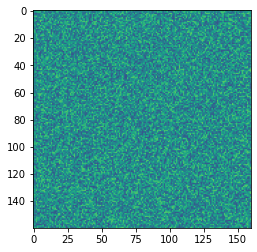

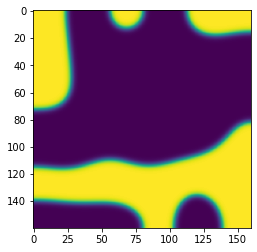

In [27]:
from scipy.integrate import odeint, solve_ivp

class AllenCahn:
    """
    An implementation of the Allen-Cahn equation in two dimensions, using the method
    of lines.
    """

    def __init__(self, nx, ny, kappa=1.0, d=1.0, Lx=1.0, Ly=1.0):
        self.nx = nx
        self.ny = ny
        self.dx = Lx / nx
        self.dy = Ly / ny
        self.d = d
        self.kappa = kappa
       
    def _laplace(self, grid):
        """
        Apply the two-dimensional Laplace operator to a square array
        """
        ################################################################################
        #
        #
        #  YOUR CODE HERE
        #  My 10 line solution is vectorized in numpy, and so it avoids using a for loop 
        #
        ################################################################################
        
        lap = np.zeros((self.ny, self.nx))

        # enforce reflection boundary conditions by padding rows and columns
        grid = np.vstack([grid[0, :][None, :], grid, grid[-1, :][None, :]])
        grid  = np.hstack([grid[:, 0][:, None], grid, grid[:, -1][:, None]])

        lap = grid[:-2, 1:-1] + grid[1:-1, :-2] + grid[2:, 1:-1] + grid[1:-1, 2:]
        lap  -= 4 * grid[1:-1, 1:-1]
        
        lap /= self.dx * self.dy
        return lap

    def _reaction(self, y):
        """
        Bistable reaction term
        """
        ################################################################################
        #
        #
        #  YOUR CODE HERE
        #
        #
        ################################################################################
        return y * (1 - y**2)

    def rhs(self, t, y):
        """
        For technical reasons, this function needs to take a one-dimensional vector, 
        and so we have to reshape the vector back into the mesh
        """
        ################################################################################
        #
        #
        #  YOUR CODE HERE
        #  My solution primariy calls private methods
        #
        #
        ################################################################################
        y = y.reshape((self.ny, self.nx))
        out = self.kappa * self._reaction(y) + self.d * self._laplace(y)
        return out.flatten()


    def solve(self, y0, t_min, t_max, nt, **kwargs):
        """
        Solve the heat equation using the odeint solver

        **kwargs are passed to scipy.integrate.solve_ivp
        """
        ################################################################################
        #
        #
        #  YOUR CODE HERE
        #  My solution is five lines, and it mainly involves setting things up to be
        #  passed to scipy.integrate.solve_ivp, and then returning the results
        #
        #
        ################################################################################
        tpts = np.linspace(t_min, t_max, nt)
        out = solve_ivp(self.rhs, (t_min, t_max), y0.flatten(), t_eval=tpts, **kwargs)
        sol = out.y.T
        tpts =  out.t
        return tpts, sol.reshape((len(tpts), self.ny, self.nx))



## Run an example simulation and plot the before and after
np.random.seed(0)
ic = np.random.random((160, 160)) - 0.5
model = AllenCahn(*ic.shape, kappa=1e1, d=1e-3)
tpts, sol = model.solve(ic, 0, 8, 400, method="DOP853")


plt.figure()
plt.imshow(sol[0], vmin=-1, vmax=1)

plt.figure()
plt.imshow(sol[-1], vmin=-1, vmax=1)


In [28]:
## Make an interactive video
from ipywidgets import interact, interactive, fixed, interact_manual, Layout
import ipywidgets as widgets

def plotter(i):
    # plt.close()
    fig = plt.figure(figsize=(10, 10))
    plt.imshow(sol[i], vmin=-1, vmax=1, cmap="coolwarm")
    plt.show()



interact(
    plotter, 
    i=widgets.IntSlider(0, 0, len(sol) - 1, 1, layout=Layout(width='500px'))
)

interactive(children=(IntSlider(value=0, description='i', layout=Layout(width='500px'), max=399), Output()), _…

<function __main__.plotter(i)>

#### Extras

In [51]:
# (Optional) I use this code to export still images, and then make a video from them using
# the command-line tool ffmpeg


for i in range(len(sol)):
    plt.figure()
    plt.imshow(sol[i], vmin=-1, vmax=1, cmap="coolwarm")
    out_path = "private_dump/frame" + str(i).zfill(4) + ".png"


    ax = plt.gca()
    ax.set_axis_off()
    ax.xaxis.set_major_locator(plt.NullLocator())
    ax.yaxis.set_major_locator(plt.NullLocator())
    ax.set_aspect(1, adjustable='box')

    plt.savefig(out_path, bbox_inches='tight', pad_inches=0.02, dpi=160)
    plt.close()



In [1]:
# (Optional) I used this code to stitch the images together into a video. The %%bash magic tells
# iPython to treat these lines as bash commands, rather than Python. I then use the 
# command-line tool `ffmpeg` to stitch the images together into a video.

%%bash
ffmpeg -r 60 -i private_dump/frame%04d.png -vf "scale=trunc(iw/2)*2:trunc(ih/2)*2" -vcodec libx264 -pix_fmt yuv420p private_dump/vid2.mov


# Turing's model of morphogenesis and spectral methods

Reaction-diffusion equations are sets of partial differential equations describing interactions among multiple coupled fields. Each field's dynamical equation contains an interaction term with the other field, and a self-only term describing diffusion in space. Reaction diffusion equations pop up in many contexts in physics, and they represent a protypical example of a system of nonlinear partial differential equations in which spatial effects give rise to unique bifurcations.

Here, we are going to visit one of the most elegant known applications of reaction-diffusion dynamics. In 1952, Alan Turing used systems of reaction-diffusion equations to propose [a model of morphogenesis](https://www.dna.caltech.edu/courses/cs191/paperscs191/turing.pdf)--the process by which cheetahs get their spots, or leaves develop their unique shapes. While conventional intution regarding biological systems might give the impression that every detail of the patterns on a zebra is programmed by an elaborate genetic circuit, Turing's model suggests that two interacting chemical fields created early during the development of an organism can spontaneously produce natural-like patterning, as long as natural selection has lead the governing parameters in the equations to have just the right values.

The simplest example of reaction-diffusion equations producing Turing patterns is the Gray-Scott model, which describes a synthesis reaction between two species:
$$
U + 2 V \rightarrow 3 V
$$
On a slower timescale, a second reaction occurs
$$
V \rightarrow P
$$
Where $P$ is an inert product representing the byproduct of the reaction. During an organism's development, the "slow" variable $V$ might represent a diffusing signalling molecule, while the fast reaction variable $U$ my represent the activity level of a gene activated by the molecule. 

If this reaction occurs across a spatial domain, then we can write two scalar fields, $u(\mathbf{r}, t)$ and $v(\mathbf{r}, t)$ describing the concentrations of the two chemical species across space.
$$
\dot u = - u v^2 + b(1 - u) + D_u \nabla^2 u    \\
\dot v = u v^2 - \kappa v + D_v \nabla^2 v
$$
where $D_u$ and $D_v$ indicate separate diffusivities for the two reagents, and $\kappa$ and $b$ parametrize autocatalysis of $U$ and degradation of $V$, respectively.

Turing's work is particularly elegant because, as a trained computer scientist, he did not have extensive biological background---he simply thought about the problem very clearly and proposed a clean minimal model consistent with observations. The generality of Turing's model for arbitrary biological systems remains a topic of research, but the reaction-diffusion model has been experimentally-tested and even directly manipulated in certain systems---including angelfish patterns, XXX, and, very recently, in lizard skins.


## Spectral methods

Turing patterns have interesting mathematical structure because they reach steady-state solutions with nontrivial spatial heterogeneity in $u(\mathbf{r}), v(\mathbf{r})$. This setting represents a perfect use case for a class of PDE solvers known as [spectral methods](http://faculty.washington.edu/rjl/classes/am590a2013/_static/Fourier-Spectral.pdf), which seek to solve spatial PDEs in spatial frequency space rather than real space

The critical idea for spectral methods is to remember that the Fourier transform of the derivative of a function is proportional to a polynomial times the function in frequency space. Using the expanded notation for a Fourier transform $U(k) \equiv \mathcal{F}[u(x)](k)$, then $\mathcal{F}[\frac{\partial}{\partial x} u(x)](k) = i k U(k)$ and $\mathcal{F}[\frac{\partial^2}{\partial^2 x} u(x)](k) = - k^2 U(k)$. These identities give us a way to transform our Gray-Scott equations into a more favorable representation; taking the Fourier transform of both sides of our equations, and then exploiting the linear properties of the Fourier transform operator, we can write our equations as
$$
\dot U = -\mathcal{F}[u v^2 + b(1 - u)] - D_u k^2 U    \\
\dot V = \mathcal{F}[u v^2 - \kappa v] - D_v k^2 V
$$
Where we have used $U, V$ to denote the respective Fourier transforms of $u$ and $v$, $U \equiv \mathcal{F}[u], V \equiv \mathcal{F}[V]$. Hereafter, will use the condensed notation $\mathcal{F}[u(x)](k) \rightarrow \mathcal{F}[u]$. Because we want to write these equations exclusively in terms of our frequency-space dynamical variables $U$ and $V$, we re-write these equations as,
$$
\dot U = -\mathcal{F}[\mathcal{F^{-1}}[U] \mathcal{F^{-1}}[V]^2 + b(1 - \mathcal{F^{-1}}[U])] - D_u k^2 U    \\
\dot V = \mathcal{F}[\mathcal{F^{-1}}[U] \mathcal{F^{-1}}[V]^2 - \kappa \mathcal{F^{-1}}[V]] - D_v k^2 V
$$
This is a bit of an ugly way to write things out, but it emphasizes the computational steps.

In the Fourier domain, we've gotten rid of the pesky Laplace operator that slowed down our integration in our previous problem. The tradeoff is that the reaction term looks more difficult now. In order to numerically integrate this equation in $U, V$ space, we would need to constantly convert between real and frequency space every time we want to compute the reaction term. Another option would be to convert *back* to real space,
$$
\dot u = - u v^2 + b(1 - u) - \mathcal{F^{-1}}[D_u k^2 \mathcal{F}[u]]   \\
\dot v = u v^2 - \kappa v - \mathcal{F^{-1}}[D_v k^2 \mathcal{F}[v]]
$$

We can see now the key idea behind spectral methods: at each timestep, we switch to whatever basis (real space or frequency space) that makes it easiest to evaluate the terms in our function. If we're working primarily in Fourier space, then we need to perform an inverse Fourier transform to calculate the real-space fields $u, v$, calculate the reaction, and then convert back to Fourier space. If we are working in real space, we need to perform a Fourier transfom to get $U, V$, calculate the diffusion term, and then perform an inverse Fourier transform to convert back to real space. If we were just solving an isolated diffusion equation, we could stay exclusively in Fourier space (likewise, real space for a purely reaction term). Unfortunately, usually won't get so lucky in real-world PDEs.

Why would performing two Fourier transforms per timestep possibly be worthwhile compared to using the discrete Laplace operator, as we did above? Two fast Fourier transforms per timestep clearly increases the runtime. The key advantage of spectral methods is that they are usually very stable for long simulations. We can decrease our mesh size (the number of spatial points in our domain), and still get a solution with the same accuracy. So, while using spectral methods increases the runtime of a single iteration of the right hand side for a given mesh size, we get time back because we can evaluate on a much coarser domain---for example, we might be able to go from a $500 \times 500$ domain to a $100 \times 100$ domain without losing much accuracy


### To Do

+ Implement the Gray-Scott equations in Python, using the spectral method and the method of lines. I've included the outline of my solution below, but feel free to structure your code differently. 
+ + Note that there are several possible ways to solve this problem: (1) exclusively in real-space (like we did above), (2) primarily in real-space, but switching to the Fourier domain and back within every call to the diffusion term, or (3) primarily working in the Fourier domain but switching back-and-forth every time every the reaction term is calculated. If you opt for the last option, remember to convert your final solution back to real space.
+ + You will likely find the functions `np.fft.fft2()` and `np.fft.ifft2()` very useful here
+ Try varying the parameters $D_u$, $D_v$ and $\beta$ in your equations. How do the solutions change? Do you have any intuition for why these changes might occur?
+ We mentioned that performing Fourier transforms at each timestep is more expensive per mesh point than computing the discrete Laplacian at each timestep. Can you give a more mathematical reason for this advantage, based on runtime scaling of Fourier transforms? How many fewer mesh points would we need to compensate?
+ Try playing around with the number of timepoints and the number of space points. When does the spectral method fail? 
+ Evolutionary biologists recently speculated that the spacing of teeth-like denticles on sharks' skin arises from a Turing mechanism. If we suppose that denticles form via a Turing instability in Gray-Scott equations in early development, which parameter of the Gray-Scott equations would evolutionary forces most strongly act upon?
+ We assumed periodic boundary conditions, which makes this problem easier to implement. How do you expect our results would change, if we had Dirichlet boundary conditions?


### Fun facts

+ Our trick of switching the equations to the frequency might not seem that satisfying---we made the diffusion term easier to solve, but at the expense of having to round-trip the reaction term between real space and frequency space at every timestep. Deciding between real space and frequency space for a numerical integration problem is very context specific---here, we could guess that spectral methods are preferable because (1) periodic boundary conditions, (2) symmetry considerations, and (3) our simple reaction term. It turns out that, for many reaction-diffusion systems, there's a way to avoid converting the reaction term at each timestep, through [clever use of integrating factors.](https://arxiv.org/abs/1810.07431)

+ We saw that the Fourier domain was a natural setting for reaction-diffusion problems. Analytical tools for predicting Turing patterns confirm the appearance of patterns corresponds to an instability where one frequency component grows exponentially at the expense of all of the others---if we think of the system as a set of coupled ODEs repesenting different spatial frequencies, the instability corresponds to a solution where one variable diverges, while all the others go to zero. You can learn more about so-called diffusion-driven instabilities in the classic text for understanding Turing patterns is 
[Murray Mathematical biology](http://pcleon.if.ufrgs.br/pub/listas-sistdin/MurrayI.pdf) (See Chapter 2).

+ You likely noticed that we glazed over the issue of boundary condiions. Projecting the PDE onto a Fourier basis implicitly assumes that we are working on a toroidal domain (a donut, in the case of a 2D system). Spectral methods include many options beyond just Fourier transforms. For Dirichlet boundary conditions, we can use [Chebyshev polynomials](https://people.maths.ox.ac.uk/trefethen/8all.pdf) as our basis functions instead.

+ Some authors describe equations like the Allen-Cahn system as one-component reaction diffusion equations, but in my view these are basically just diffusion equations with forcing. These normally don't exhibit the kinds of intriguing spatial dynamics we explore here. However, depending on their parameters, single-component diffusion-like equations can product travelling, soliton-like fronts, which have been used to describe everything from epidemic spread, to propogation of beneficial genetic mutations, to 

+ [Dedalus](https://dedalus-project.org/) is an excellent new Python library for solving PDEs with spectral methods. The earlier MATLAB library [chebfun](https://www.chebfun.org/) has slightly lighter syntax, and now supports other languages, including Python.

Imaginary residual is: 0.0


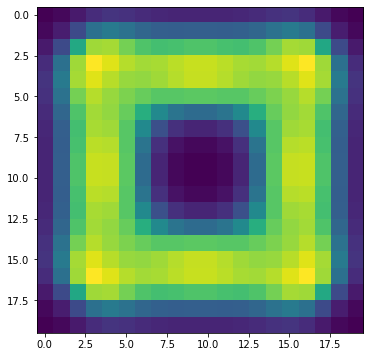

In [13]:
from scipy.integrate import odeint, solve_ivp

class GrayScott:
    """
    Simulate the two-dimensional Gray-Scott model
    """
    # def __init__(self, nx, ny, du=0.1, dv=0.05, b=0.0545, kappa=0.1, Lx=1.0, Ly=1.0):
    def __init__(self, nx, ny, du=0.1, dv=0.05, b=0.0545, kappa=0.1165, Lx=1.0, Ly=1.0):
        self.nx, self.ny = nx, ny
        self.dx = Lx / nx
        self.dy = Ly / ny
        self.du, self.dv = du, dv
        self.kappa = kappa
        self.b = b
        
        kx = (2 * np.pi / Lx) * np.hstack([np.arange(nx / 2 + 1), np.arange(1 - nx / 2, 0)]) / nx
        ky = (2 * np.pi / Ly) * np.hstack([np.arange(ny / 2 + 1), np.arange(1 - ny / 2, 0)]) / ny
        self.kx, self.ky = kx, ky

        kxx, kyy = np.meshgrid(kx, ky)
        ksq = kxx**2 + kyy**2
        self.ksq = ksq
        # self.ksq = ksq.flatten()

        # These are some speed hacks. Instead of repeatedly flattening and then reshaping
        # the arrays, we can just augment our parameter array. We gain speed at the 
        # expense of memory.
        self.d = np.hstack([self.du * np.ones(nx * ny), self.dv * np.ones(nx * ny)])
        # self.ksq_stack = np.hstack([self.ksq, self.ksq])
        
    def _reaction(self, y):
        """
        Bistable reaction term: cast into real space, perform reaction, and then cast
        back into Fourier space.
        """
        ########
        #
        # Your code here. I recommend performing the reaction in real space
        #
        ########
        u, v = y[:(self.ny * self.nx)], y[-(self.ny * self.nx):]
        uv2 = u * (v**2)
        rxn_u = -uv2 + self.b * (1 - u)
        rxn_v = uv2 - self.kappa * v
        y_out = np.hstack([rxn_u, rxn_v])
       
        return y_out

    def _laplace(self, y):
        """
        Calculate the Laplacian in real space
        """
        y = np.reshape(y, (self.nx, self.ny))
        lap = np.zeros((self.ny, self.nx))
        # enforce reflection boundary conditions by padding rows and columns
        y = np.vstack([y[-1, :][None, :], y, y[0, :][None, :]])
        y = np.hstack([y[:, -1][:, None], y, y[:, 0][:, None]])

        # calculate vectorized laplace operator
        lap = y[:-2, 1:-1] + y[1:-1, :-2] + y[2:, 1:-1] + y[1:-1, 2:]
        lap  -= 4 * y[1:-1, 1:-1]
        
        #lap /= self.dx * self.dy
        return lap.flatten()


    # def _laplace(self, y):
    #     """
    #     Calculate the Laplacian in Fourier space
    #     """
    #     y = np.reshape(y, (self.nx, self.ny))
    #     yk = np.fft.fft2(y)
    #     lap = -self.ksq * yk
    #     lap = np.fft.ifft2(lap)
    #     return np.real(lap).flatten()


    def _diffusion(self, y):
        u, v = y[:(self.ny * self.nx)], y[-(self.ny * self.nx):]
        lap_u = self._laplace(u)
        lap_v = self._laplace(v)
        u_out = self.du * lap_u
        v_out = self.dv * lap_v
        y_out = np.hstack([u_out, v_out])
        return y_out



    def rhs(self, t, y):
        """
        For technical reasons, this function needs to take a one-dimensional vector, 
        and so we have to reshape the vector back into the mesh
        """
        out = self._reaction(y) + self._diffusion(y)
        return out


    def solve(self, y0, t_min, t_max, nt, **kwargs):
        """
        Solve the heat equation using the odeint solver

        **kwargs are passed to scipy.integrate.solve_ivp
        """
        u0, v0 = y0
        tpts = np.linspace(t_min, t_max, nt)
        y0 = np.hstack([u0.flatten(), v0.flatten()])
        out = solve_ivp(self.rhs, (t_min, t_max), y0, t_eval=tpts, **kwargs)
        sol = out.y.T

        # dt = tpts[1] - tpts[0]
        # sol = y0
        # all_sol = [np.copy(sol)]
        # for t in tpts[1:]:
        #     sol += dt * self.rhs(t, sol)
        #     all_sol.append(np.copy(sol))
        # sol = np.array(all_sol)
        # print(sol.shape)

        
        u, v = sol[:, :self.nx * self.ny], sol[:, self.nx * self.ny:]
        u = np.reshape(u, (nt, self.ny, self.nx))
        v = np.reshape(v, (nt, self.ny, self.nx))
        return tpts, np.stack([u, v], axis=-1)
        

def make_initial_conditions(n):
    u, v = np.ones((n, n)), np.zeros((n, n))
    x, y = np.meshgrid(np.linspace(0, 1, n), np.linspace(0, 1, n))
    mask = (0.4 < x) & (x < 0.6) & (0.4 < y) & (y < 0.6)
    u[mask] = 0.50
    v[mask] = 0.25
    return u, v

# xx, yy = np.meshgrid(np.linspace(-1, 1, 200), np.linspace(-1, 1, 200))
xx, yy = np.meshgrid(np.linspace(-1, 1, 20), np.linspace(-1, 1, 20))
rr =  (xx**2 + yy**2)**0.5
u_ic = 1 - 0.5 * np.copy(np.exp(-rr**2 - xx**2))
v_ic = 0.25 * np.copy(np.exp(-rr**2))

# u_ic, v_ic = make_initial_conditions(200)


model = GrayScott(*u_ic.shape)
# tpts, sol = model.solve([u_ic, v_ic], 0, 8, 500, method="DOP853")
# tpts, sol = model.solve([u_ic, v_ic], 0, 10, 100)
tpts, sol = model.solve([u_ic, v_ic], 0, 3000, 500)
# sol = np.real(sol)

# should be small
print(f"Imaginary residual is: {np.mean(np.abs(np.imag(np.array(sol))))}")
sol = np.real(sol)

plt.figure(figsize=(6, 6))
plt.imshow(sol[-1, ..., 1])

# np.random.seed(0)
# ic = np.random.random((160, 160)) - 0.5
# model = AllenCahn(*ic.shape, kappa=1e1, d=1e-3)
# tpts, sol = model.solve(ic, 0, 8, 400, method="DOP853")

# sol2 = list()
# for row in sol:
#     sol2.append(np.fft.ifft2(row.reshape(*ic.shape)))
# sol2 = np.array(sol2)

# sol2 = np.real(sol2)
# sol = sol2


# plt.figure()
# plt.imshow(sol2[0], vmin=-1, vmax=1)

# plt.figure()
# plt.imshow(sol2[-1], vmin=-1, vmax=1)

    # def __call__(self, t, X):
        
        
        
    #     udot = 1 - u - self.mu*u*v**2
    #     vdot = self.v0 - self.p*v + self.mu*u*v**2
        
    #     udiff = (u[np.newaxis, :] - u[:, np.newaxis])
    #     vdiff = (v[np.newaxis, :] - v[:, np.newaxis])
        
    #     k = self.k
        
    #     udot += np.sum(k*udiff, axis=1)
    #     vdot += np.sum(k*vdiff, axis=1)
        
    #     ## diffusion term
    #     udot += self.d1*(np.roll(u, 1) - 2*u +  np.roll(u, -1))
    #     vdot += self.d2*(np.roll(v, 1) - 2*v +  np.roll(v, -1))
        
    #     return np.hstack([udot, vdot])

    # http://faculty.washington.edu/rjl/classes/am590a2013/_static/Fourier-Spectral.pdf


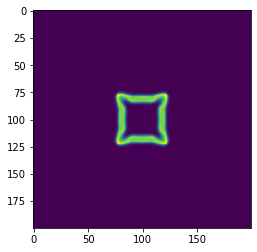

In [163]:
plt.figure()

plt.imshow(sol[-1, ..., -1])

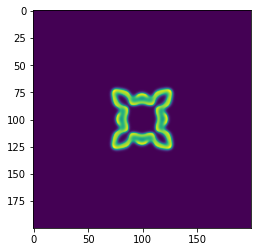

In [129]:
plt.figure()

plt.imshow(sol[-1, ..., -1])

In [74]:
from scipy.integrate import odeint, solve_ivp

class GrayScott:
    """
    Simulate the two-dimensional Gray-Scott model
    """
    # def __init__(self, nx, ny, du=0.1, dv=0.05, b=0.0545, kappa=0.1, Lx=1.0, Ly=1.0):
    def __init__(self, nx, ny, du=0.1, dv=0.05, b=0.0545, kappa=0.1165, Lx=1.0, Ly=1.0):
        self.nx, self.ny = nx, ny
        self.dx = Lx / nx
        self.dy = Ly / ny
        self.du, self.dv = du, dv
        self.kappa = kappa
        self.b = b
        
        kx = (np.pi / Lx) * np.hstack([np.arange(nx / 2 + 1), np.arange(1 - nx / 2, 0)])
        ky = (np.pi / Ly) * np.hstack([np.arange(ny / 2 + 1), np.arange(1 - ny / 2, 0)])
        self.kx, self.ky = kx, ky

        kxx, kyy = np.meshgrid(kx, ky)
        ksq = kxx**2 + kyy**2
        self.ksq = ksq.flatten()

        # These are some speed hacks. Instead of repeatedly flattening and then reshaping
        # the arrays, we can just augment our parameter array. We gain speed at the 
        # expense of memory.
        self.d = np.hstack([self.du * np.ones(nx * ny), self.dv * np.ones(nx * ny)])
        self.ksq_stack = np.hstack([self.ksq, self.ksq])
        
    def _reaction(self, y):
        """
        Bistable reaction term: cast into real space, perform reaction, and then cast
        back into Fourier space.
        """
        ########
        #
        # Your code here. I recommend performing the reaction in real space, and using
        # the appropriate transformations to cast back and forth within the function.
        #
        ########

        # uvv = u*v*v
        # u += Du*Lu - uvv + F*(1 - u)
        # v += Dv*Lv + uvv - (F + k)*v

        u = np.fft.ifft2(np.reshape(y[:self.nx * self.ny], (self.nx, self.ny)))
        v = np.fft.ifft2(np.reshape(y[-self.nx * self.ny:], (self.nx, self.ny)))

        # u = np.real(u)
        # v = np.real(v)

        uv2 = u * (v**2)
        rxn_u = -uv2 + self.b * (1 - u)
        rxn_v = uv2 - self.kappa * v

        uk_out = np.fft.fft2(rxn_u)
        vk_out = np.fft.fft2(rxn_v)
        yk_out = np.hstack([uk_out.flatten(), vk_out.flatten()])
        return yk_out

    # def _diffusion(self, y):
    #     """
    #     Diffusion term: cast into real space, perform diffusion, and then cast
    #     back into Fourier space.
    #     """
    #     ########
    #     #
    #     # Your code here. I recommend performing the diffusion in real space, and using
    #     # the appropriate transformations to cast back and forth within the function.
    #     #
    #     ########
    #     uk, vk = y[:self.nx * self.ny], y[self.nx * self.ny:]
    #     uk = np.reshape(u, (self.ny, self.nx))
    #     vk = np.reshape(v, (self.ny, self.nx))
    #     u = np.fft.ifft2(uk)
    #     v = np.fft.ifft2(vk)

    #     udiff = np.fft.fft2(np.roll(u, 1, axis=0) - 2*u + np.roll(u, -1, axis=0))
    #     vdiff = np.fft.fft2(np.roll(v, 1, axis=0) - 2*v + np.roll(v, -1, axis=0))

    #     uk_out = self.du * udiff
    #     vk_out = self.dv * vdiff
    #     yk_out = np.hstack([uk_out.flatten(), vk_out.flatten()])
    #     return yk_out

    def _diffusion(self, y):
        """
        Perform diffusion in Fourier space
        """
        ########
        #
        # Your code here. My solution is one line, but it depends on how you handle 
        # the two different diffusion coefficients.
        #
        ########

        return -self.d * self.ksq_stack * y
       # return -self.d * self.ksq_stack  * y

    def rhs(self, t, y):
        """
        For technical reasons, this function needs to take a one-dimensional vector, 
        and so we have to reshape the vector back into the mesh
        """
        # uv2 = u * (v**2)
        # rhs_u = -uv2 + a * (1 - u)
        # rhs_v = uv2 - b * v
        # return rhs_u, rhs_v
        #y = y.reshape((self.ny, self.nx))

        out = 10*self._reaction(y) + self._diffusion(y)

        return out


    def solve(self, y0, t_min, t_max, nt, **kwargs):
        """
        Solve the heat equation using the odeint solver

        **kwargs are passed to scipy.integrate.solve_ivp
        """
        u0, v0 = y0
        tpts = np.linspace(t_min, t_max, nt)
        u0k, v0k = np.fft.fft2(u0), np.fft.fft2(v0) # initial condition in Fourier space
        y0k = np.hstack([u0k.flatten(), v0k.flatten()])

        out = solve_ivp(self.rhs, (t_min, t_max), y0k, t_eval=tpts, **kwargs)
        sol = out.y.T

        # convert back to real space
        sol2 = list()
        for row in sol:
            sol2.append([
                np.fft.ifft2(np.reshape(row[:self.nx * self.ny], (self.nx, self.ny))),
                np.fft.ifft2(np.reshape(row[-self.nx * self.ny:], (self.nx, self.ny)))
            ])
        sol2 = np.moveaxis(np.array(sol2), 1, 3)

        return tpts, sol2
        

# np.random.seed(0)
# u_ic = 2 * (np.random.random((160, 160)) - 0.5)
# v_ic = 2 * (np.random.random((160, 160)) - 0.5)


def make_initial_conditions(n):
    u = np.ones((n + 2,n + 2))
    v = np.zeros((n + 2,n + 2))
    x, y = np.meshgrid(np.linspace(0, 1, n + 2), np.linspace(0, 1, n + 2))
    mask = (0.4 < x) & (x < 0.6) & (0.4 < y) & (y < 0.6)
    u[mask] = 0.50
    v[mask] = 0.25
    return u, v

xx, yy = np.meshgrid(np.linspace(-1, 1, 100), np.linspace(-1, 1, 100))
rr =  (xx**2 + yy**2)**0.5
u_ic = 1 - 0.5 * np.copy(np.exp(-rr**2))
# v_ic = 0.25 * np.copy(np.exp(-rr**2-xx))
v_ic = 0.25 * np.copy(np.exp(-rr**2))

u_ic, v_ic = make_initial_conditions(100)


model = GrayScott(*u_ic.shape)
# tpts, sol = model.solve([u_ic, v_ic], 0, 8, 500, method="DOP853")
tpts, sol = model.solve([u_ic, v_ic], 0, 10, 500)
# sol = np.real(sol)

# should be small
print(f"Imaginary residual is: {np.mean(np.abs(np.imag(np.array(sol))))}")
sol = np.real(sol)

# np.random.seed(0)
# ic = np.random.random((160, 160)) - 0.5
# model = AllenCahn(*ic.shape, kappa=1e1, d=1e-3)
# tpts, sol = model.solve(ic, 0, 8, 400, method="DOP853")

# sol2 = list()
# for row in sol:
#     sol2.append(np.fft.ifft2(row.reshape(*ic.shape)))
# sol2 = np.array(sol2)

# sol2 = np.real(sol2)
# sol = sol2


# plt.figure()
# plt.imshow(sol2[0], vmin=-1, vmax=1)

# plt.figure()
# plt.imshow(sol2[-1], vmin=-1, vmax=1)

    # def __call__(self, t, X):
        
        
        
    #     udot = 1 - u - self.mu*u*v**2
    #     vdot = self.v0 - self.p*v + self.mu*u*v**2
        
    #     udiff = (u[np.newaxis, :] - u[:, np.newaxis])
    #     vdiff = (v[np.newaxis, :] - v[:, np.newaxis])
        
    #     k = self.k
        
    #     udot += np.sum(k*udiff, axis=1)
    #     vdot += np.sum(k*vdiff, axis=1)
        
    #     ## diffusion term
    #     udot += self.d1*(np.roll(u, 1) - 2*u +  np.roll(u, -1))
    #     vdot += self.d2*(np.roll(v, 1) - 2*v +  np.roll(v, -1))
        
    #     return np.hstack([udot, vdot])

    # http://faculty.washington.edu/rjl/classes/am590a2013/_static/Fourier-Spectral.pdf


KeyboardInterrupt: 

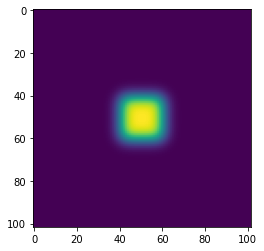

In [72]:
plt.imshow(sol[100, ..., 1])

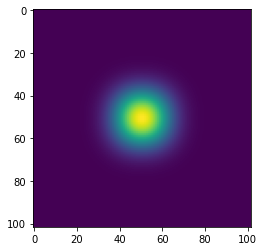

In [70]:
plt.imshow(sol[-1, ..., 1])

In [39]:
def numpy_grayscott(U, V, Du, Dv, F, k):
    
    u, v = U[1:-1,1:-1], V[1:-1,1:-1]

    Lu = laplacian(U)
    Lv = laplacian(V)

    uvv = u*v*v
    u += Du*Lu - uvv + F*(1 - u)
    v += Dv*Lv + uvv - (F + k)*v

    periodic_bc(U)
    periodic_bc(V)
    
    return U, V

def laplacian(u, Lx=1, Ly=1):
    """
    second order finite differences
    """

    uk = np.fft.fft2(u)
    nx, ny = u.shape
    
    kx = (np.pi / Lx) * np.hstack([np.arange(nx / 2 + 1), np.arange(1 - nx / 2, 0)])
    ky = (np.pi / Ly) * np.hstack([np.arange(ny / 2 + 1), np.arange(1 - ny / 2, 0)])
    kxx, kyy = np.meshgrid(kx, ky)
    ksq = kxx**2 + kyy**2

    return np.real(np.fft.ifft2(-uk * ksq))[1:-1,1:-1]

    # return (                  u[ :-2, 1:-1] +
    #          u[1:-1, :-2] - 4*u[1:-1, 1:-1] + u[1:-1, 2:] +
    #                       +   u[2:  , 1:-1] )

def periodic_bc(u):
    u[0, :] = u[-2, :]
    u[-1, :] = u[1, :]
    u[:, 0] = u[:, -2]
    u[:, -1] = u[:, 1]

Du, Dv = .1, .05
F, k = 0.0545, 0.062
U, V = make_initial_conditions(300)
all_frames = []
for t in range(10000):
    U, V = numpy_grayscott(U, V, Du, Dv, F, k)
    if t % 1000 == 0:
        all_frames.append(np.copy(V))

/var/folders/g_/3gcjjjc12l9cjdh8drtctrdm0000gp/T/ipykernel_41948/2785302125.py:8: RuntimeWarning: overflow encountered in multiply
  uvv = u*v*v


KeyboardInterrupt: 

In [42]:
# plt.imshow(all_frames[-1])

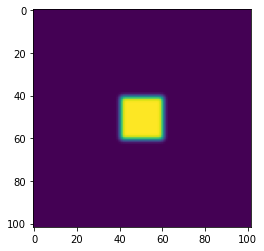

In [41]:
plt.imshow(sol[-1, ..., 1])

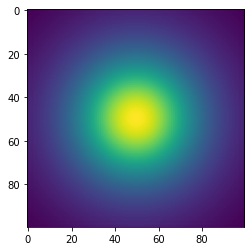

In [171]:
plt.imshow(np.real(sol[-1, ..., 1]))

In [26]:
from ipywidgets import interact, interactive, fixed, interact_manual, Layout
import ipywidgets as widgets

def plotter(i):
    # plt.close()
    fig = plt.figure(figsize=(10, 10))
    plt.imshow(sol[i], vmin=-1, vmax=1, cmap="coolwarm")
    plt.show()



interact(
    plotter, 
    i=widgets.IntSlider(0, 0, len(sol) - 1, 1, layout=Layout(width='500px'))
)

interactive(children=(IntSlider(value=0, description='i', layout=Layout(width='500px'), max=49), Output()), _d…

<function __main__.plotter(i)>

In [ ]:
from scipy.integrate import odeint, solve_ivp

class AllenCahn:
    """
    Simulate the two-dimensional Allen-Cahn model using spectral methods
    """
    def __init__(self, nx, ny, d=1.0, kappa=1.0, Lx=1.0, Ly=1.0):
        self.nx, self.ny = nx, ny
        self.dx = Lx / nx
        self.dy = Ly / ny
        self.d = d
        self.kappa = kappa
        
        kx = (np.pi / Lx) * np.hstack([np.arange(nx / 2 + 1), np.arange(1 - nx / 2, 0)])
        ky = (np.pi / Ly) * np.hstack([np.arange(ny / 2 + 1), np.arange(1 - ny / 2, 0)])
        self.kx, self.ky = kx, ky

        kxx, kyy = np.meshgrid(kx, ky)
        ksq = kxx**2 + kyy**2
        self.ksq = ksq.flatten()

        
    def _reaction(self, y):
        """
        Bistable reaction term: cast into real space, perform reaction, and then cast
        back into Fourier space.
        """
        ########
        #
        # Your code here. I recommend performing the reaction in real space, and using
        # the appropriate transformations to cast back and forth within the function.
        #
        ########
        y = np.reshape(y, (self.ny, self.nx))
        yh = np.fft.ifft2(y)
        out = np.fft.fft2(yh * (1 - yh**2))
        return out.flatten()

    def rhs(self, t, y):
        """
        For technical reasons, this function needs to take a one-dimensional vector, 
        and so we have to reshape the vector back into the mesh
        """
        return self.kappa * self._reaction(y) - self.d * self.ksq  * y


    def solve(self, y0, t_min, t_max, nt, **kwargs):
        """
        Solve the heat equation using the odeint solver

        **kwargs are passed to scipy.integrate.solve_ivp
        """
        tpts = np.linspace(t_min, t_max, nt)
        y0_k = np.fft.fft2(y0)

        out = solve_ivp(self.rhs, (t_min, t_max), y0_k.flatten(), t_eval=tpts, **kwargs)
        sol = out.y.T
        tpts =  out.t
        return tpts, sol
        

np.random.seed(0)
ic = 2 * (np.random.random((160, 160)) - 0.5)
model = GrayScott(*ic.shape, kappa=1e1, d=1e-3)
tpts, sol = model.solve(ic, 0, 8, 500, method="DOP853")
# sol = np.real(sol)

# np.random.seed(0)
# ic = np.random.random((160, 160)) - 0.5
# model = AllenCahn(*ic.shape, kappa=1e1, d=1e-3)
# tpts, sol = model.solve(ic, 0, 8, 400, method="DOP853")

sol2 = list()
for row in sol:
    sol2.append(np.fft.ifft2(row.reshape(*ic.shape)))
sol2 = np.array(sol2)
print(f"Sanity check: imaginary residual is: {np.mean(np.abs(np.imag(np.array(sol2))))}")
sol2 = np.real(sol2)
sol = sol2


plt.figure()
plt.imshow(sol2[0], vmin=-1, vmax=1)

plt.figure()
plt.imshow(sol2[-1], vmin=-1, vmax=1)


# Instructor's notes and to-do list for this homework

+ Add code to compare scaling and blowups for spectral and real-space finite-difference methods
+ Consider adding a demo calculating the analytical bifurcation threshold for GS equations, and compare to when numerics show bifurcation. Show how bifurcation point convergence improves with mesh
+ Mention CFL condition for NS equations
+ Add Fourier upsampling code for better videos

# Run Tests to see that everything is working

In [24]:
import sys, os, unittest
from datetime import datetime

class TestPowerMethod(unittest.TestCase):

    def test_initialization(self):
        method = PowerMethod(max_iter=13)
        assert method.max_iter == 13

    def test_fitting(self):
        assert True

    def test_eigspec(self):
        np.random.random((5,5))


print(print(os.getcwd()))
print(datetime.now().strftime("%H:%M:%S"))

unittest.main(argv=[''], exit=False)



...

/Users/williamgilpin/Documents/courses/phys381c_fall2022/hw1
None
21:32:53



----------------------------------------------------------------------
Ran 3 tests in 0.001s

OK


In [ ]:
## We are going to do something super challenging: we are going to implement a random forest
## from scratch. 